In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spamemail/combined_data.csv


In [2]:
pip install --upgrade matplotlib seaborn pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 89.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 102.8 MB/s eta 0:00:0000:010:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.5
    Uninstalling matplotlib-3.7.5:
      Successfully uninstalled matplotlib-3.7.5
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-c

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("/kaggle/input/spamemail/combined_data.csv")

In [5]:
df.shape

(83448, 2)

In [6]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [7]:
df['text'][0]

'ounce feather bowl hummingbird opec moment alabaster valkyrie dyad bread flack desperate iambic hadron heft quell yoghurt bunkmate divert afterimage'

In [8]:
df['text'][15]

"cnnmoney the opportunity for functional beverages is\nestimated at $ 20 billion annually in the u . s . alone and\nexpected to grow over 15 percent each year .\ncbsnews . com functional beverages are becomming a\nmulti - billion dollar industry worldwide .\nwe are comming to your country . . . be the first ! !\ntiming is perfect , sales exploding in the u . s . and canada\ncurrently and in each new country that opens ! !\nhere is a quick overview :\n: : the product : : exclusive ! !\n* himalayian goji juice ( just released )\n* delicious liquid anti - aging , anti - oxidant\n* makes you feel good , look good , lose weight\n* increases your energy , reduces stress , much more ! !\n* tastes great !\n* formulated by dr . earl mindell\n* world ' s # 1 nutritionist\n* author of the ny times bestseller : the vitamin bible\nproven , debt free , 9 year old company with a new product\nas of oct . 2003 , is expanding into 25 new countries in\nthe next 60 days ! !\nno competition ! !\ncompany lo

In [9]:
df['length'] = df['text'].apply(len)

In [10]:
df.head()

,label,text,length
0,1,ounce feather bowl hummingbird opec moment ala...,148
1,1,wulvob get your medircations online qnb ikud v...,808
2,0,computer connection from cnn com wednesday es...,2235
3,1,university degree obtain a prosperous future m...,592
4,0,thanks for all your answers guys i know i shou...,1362


In [11]:
df.groupby('label')['length'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,39538.0,2121.693814,5666.075286,1.0,579.0,1139.0,2174.0,598705.0
1,43910.0,1249.887247,1978.631507,1.0,360.0,704.0,1510.0,144087.0


In [12]:
df[df['length'] > 144087]

,label,text,length
475,0,"rival to buy enron , top energy trader , after...",178837
51996,0,enron : a wake - up call\nthe wall street jour...,228353
52108,0,commit a snapshot of the generated prototype h...,598705
63878,0,at file home jelmer bzr samba old escapenumber...,156208
68692,0,fall of a power giant : bailout is unlikely if...,165933


In [13]:
df[df['length'] < 144087]

,label,text,length
0,1,ounce feather bowl hummingbird opec moment ala...,148
1,1,wulvob get your medircations online qnb ikud v...,808
2,0,computer connection from cnn com wednesday es...,2235
3,1,university degree obtain a prosperous future m...,592
4,0,thanks for all your answers guys i know i shou...,1362
...,...,...,...
83443,0,hi given a date how do i get the last date of ...,2589
83444,1,now you can order software on cd or download i...,616
83445,1,dear valued member canadianpharmacy provides a...,534
83446,0,subscribe change profile contact us long term ...,2113


In [14]:
df = df[df['length'] < 200000]

In [15]:
df[df['length'] > 200000]

,label,text,length


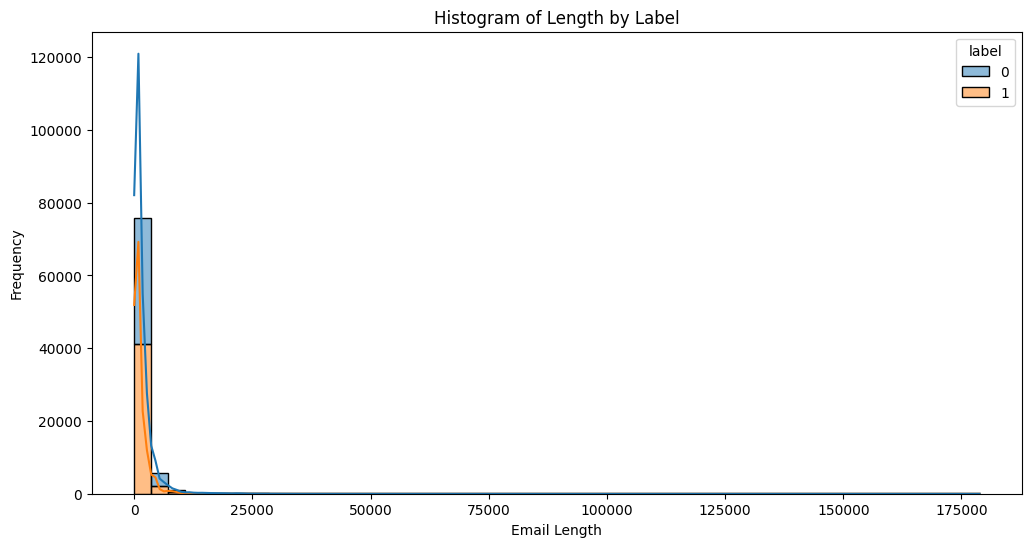

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="When grouping with a length-1 list-like")

# Plot histogram with updated styling
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df, 
    x='length', 
    hue='label', 
    bins=50, 
    kde=True, 
    multiple='stack'
)

plt.title('Histogram of Length by Label')
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.show()

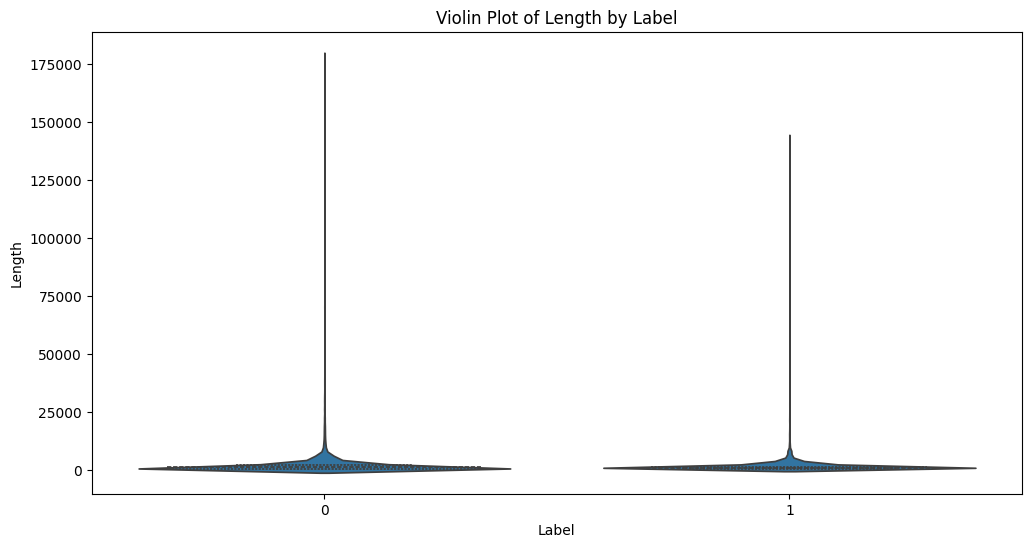

In [17]:

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='label', y='length', inner="quart")
plt.title('Violin Plot of Length by Label')
plt.xlabel('Label')
plt.ylabel('Length')
plt.show()

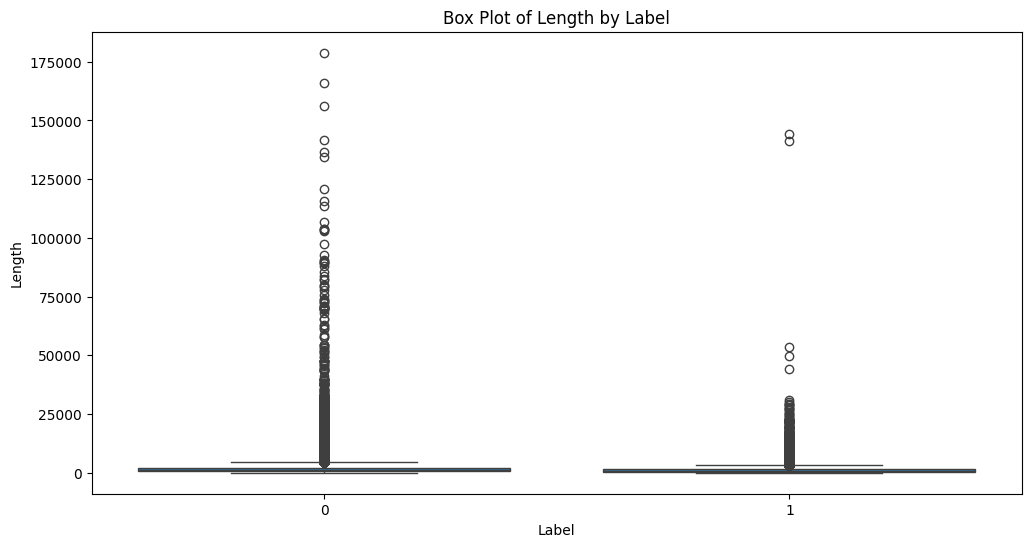

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='label', y='length')
plt.title('Box Plot of Length by Label')
plt.xlabel('Label')
plt.ylabel('Length')
plt.show()

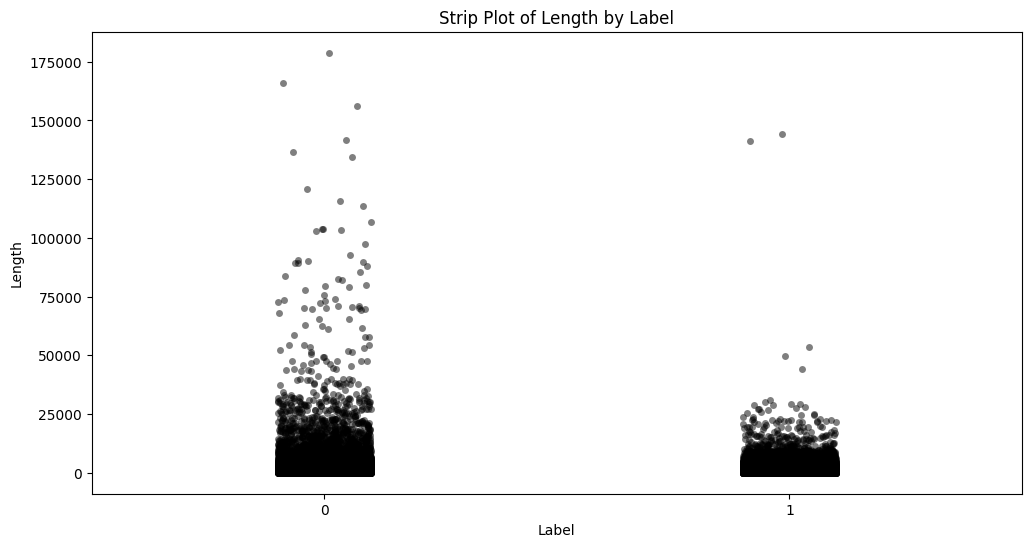

In [19]:

plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='label', y='length', jitter=True, color='black', alpha=0.5)
plt.title('Strip Plot of Length by Label')
plt.xlabel('Label')
plt.ylabel('Length')
plt.show()

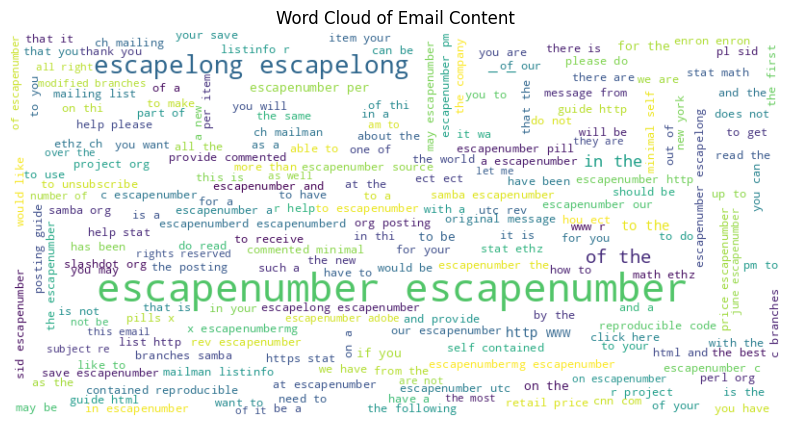

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all email texts into a single string
text = ' '.join(df['text'])

# Generate and display word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Email Content')
plt.show()

In [21]:
df['label'].value_counts()

label
1    43910
0    39536
Name: count, dtype: int64

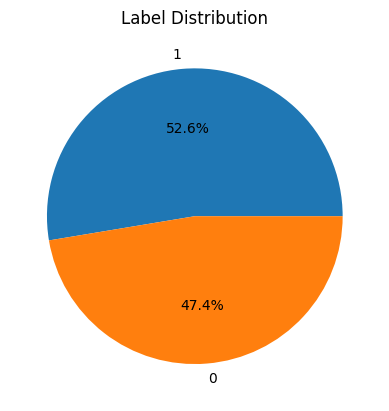

In [22]:
plt.pie(df['label'].value_counts(), labels=df['label'].unique(), autopct='%1.1f%%')
plt.title('Label Distribution')
plt.show()

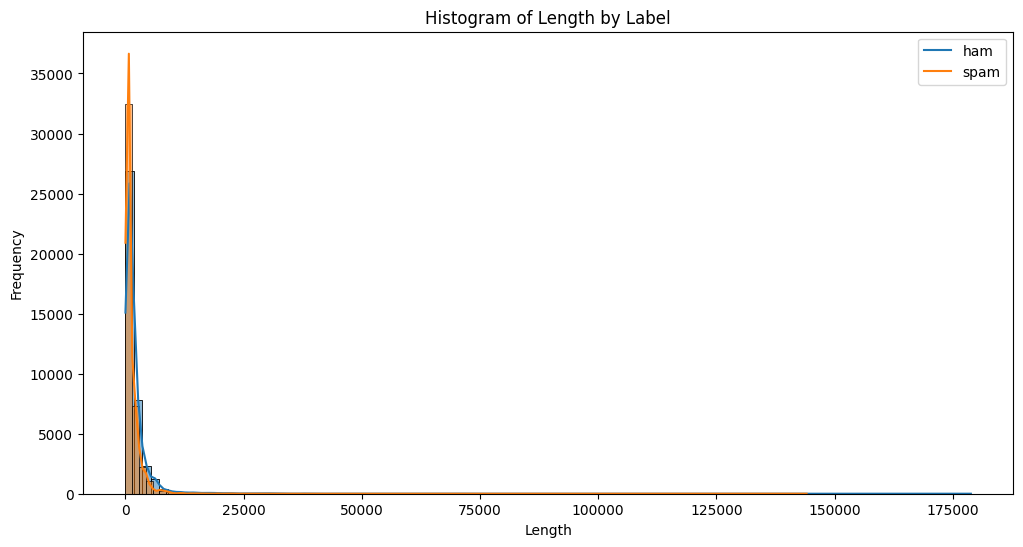

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label']==0]['length'],bins=100,kde=True)
sns.histplot(df[df['label']==1]['length'],bins=100,kde=True)
plt.legend(['ham', 'spam'])
plt.title('Histogram of Length by Label')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

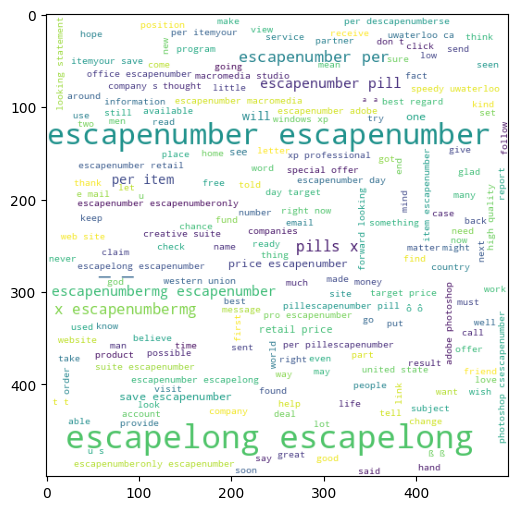

In [24]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


spam_wc = wc.generate(df[df['label'] == 1]['text'].str.cat(sep=" "))


plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

*
-->The word like ['fund','email','website','click','per','account','escapenumber'] are the word which occur more in spam email

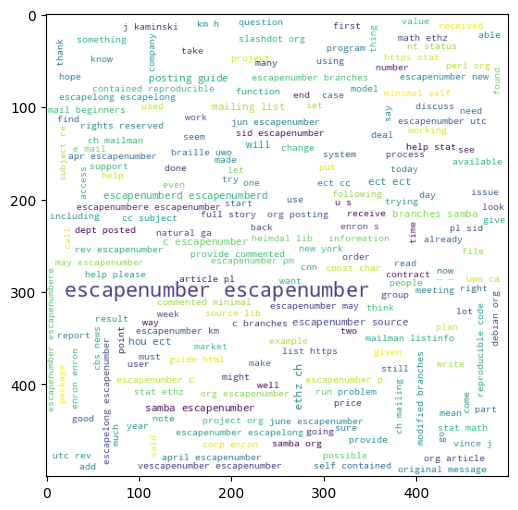

In [25]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


spam_wc = wc.generate(df[df['label'] == 0]['text'].str.cat(sep=" "))


plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [26]:
df.drop('length',axis=1,inplace=True)

In [27]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [28]:
!pip install transformers datasets torch evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.5 MB/s eta 0:00:00


In [29]:
from datasets import load_dataset, DatasetDict

# Replace with the path to your CSV file
file_path = "/kaggle/input/spamemail/combined_data.csv"

# Load the dataset from the CSV file
dataset = load_dataset("csv", data_files={"data": file_path})

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
split_dataset = dataset["data"].train_test_split(test_size=0.2)

# Convert to DatasetDict for easy access
dataset = DatasetDict({
    "train": split_dataset["train"],
    "test": split_dataset["test"]
})

# Inspect the dataset structure
print(dataset)

Generating data split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 66758
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 16690
    })
})


In [30]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Use a pre-trained model
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
# Tokenize the dataset
def preprocess(data):
    return tokenizer(data["text"], padding="max_length", truncation=True, max_length=512)

tokenized_dataset = dataset.map(preprocess, batched=True)

Map:   0%|          | 0/66758 [00:00<?, ? examples/s]

Map:   0%|          | 0/16690 [00:00<?, ? examples/s]

In [32]:
from transformers import DataCollatorWithPadding
from torch.utils.data import DataLoader

# Create data collator and dataloaders
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
train_dataloader = DataLoader(tokenized_dataset["train"], batch_size=8, shuffle=True, collate_fn=data_collator)
test_dataloader = DataLoader(tokenized_dataset["test"], batch_size=8, shuffle=False, collate_fn=data_collator)

In [33]:
from evaluate import load
import numpy as np

accuracy_metric = load("accuracy")

def compute_metrics(pred):
    logits, labels = pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

In [34]:
from transformers import TrainingArguments, Trainer

# Define training arguments
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    report_to="none",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    processing_class=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.000500,0.046387,0.991791
2,0.000700,0.038160,0.992331
3,0.000000,0.038737,0.994548


TrainOutput(global_step=25035, training_loss=0.031246817219366167, metrics={'train_runtime': 12046.4638, 'train_samples_per_second': 16.625, 'train_steps_per_second': 2.078, 'total_flos': 5.269430350116864e+16, 'train_loss': 0.031246817219366167, 'epoch': 3.0})

In [35]:
# Save model and tokenizer
model.save_pretrained("./spam_classifier_model")
tokenizer.save_pretrained("./spam_classifier_model")

('./spam_classifier_model/tokenizer_config.json',
 './spam_classifier_model/special_tokens_map.json',
 './spam_classifier_model/vocab.txt',
 './spam_classifier_model/added_tokens.json',
 './spam_classifier_model/tokenizer.json')

In [37]:
from transformers import pipeline

# Load the saved model
classifier = pipeline("text-classification", model="./spam_classifier_model", tokenizer="./spam_classifier_model")

# Test with new examples
texts = ["Get your free gift card now!", "Let's schedule a meeting tomorrow."]
predictions = classifier(texts)

# Map LABEL_1 to spam and LABEL_0 to ham
label_mapping = {"LABEL_1": "spam", "LABEL_0": "ham"}
mapped_predictions = [{"label": label_mapping[pred["label"]], "score": pred["score"]} for pred in predictions]

print(mapped_predictions)

Device set to use cuda:0


[{'label': 'spam', 'score': 0.9999970197677612}, {'label': 'ham', 'score': 0.9999885559082031}]


In [38]:
import shutil

# Compress the directory into a ZIP file
shutil.make_archive("spam_classifier_model", 'zip', "./spam_classifier_model")

'/kaggle/working/spam_classifier_model.zip'